# Table of Contents
* [Approximations for the Transparent Boundary Conditions - paper of Besse et al (2015)](#Approximations-for-the-Transparent-Boundary-Conditions---paper-of-Besse-et-al-%282015%29)
	* [Description of the TBCs](#Description-of-the-TBCs)
	* [Approximation of the TBCs](#Approximation-of-the-TBCs)
		* [Approximation using a constant polynomial](#Approximation-using-a-constant-polynomial)
		* [Approximation using a linear polynomial](#Approximation-using-a-linear-polynomial)
	* [Numerical tests](#Numerical-tests)
		* [Polynomial of order 0](#Polynomial-of-order-0)
		* [Polynomial of order 1](#Polynomial-of-order-1)
		* [Comparison between the two approximations](#Comparison-between-the-two-approximations)


# Approximations for the Transparent Boundary Conditions - paper of Besse et al (2015)

$ \newcommand{\laplinv}{\mathcal{L}^{-1}}$

## Description of the TBCs

In this notebook, we will follow the formulation of Transparent Boundary Conditions (TBCs) derived for the continuous version of the homogeneous and linearized KdV equation in the paper of Besse et al (2015):

\begin{equation}
\label{eq:kdv}
u_t + U_1u_x + U_2u_{xxx} = 0, \ \ U_1 \in \mathbb{R}, \ \ U_2 > 0
\end{equation}

Denoting by $\laplinv$ the inverse Laplace transform, the TBCs are

\begin{equation}
\label{eq:TBC}
    \begin{cases}
        u(t,a) - U_2 \laplinv \left( \frac{\lambda_1(s)^2}{s} \right) * u_x(t,a) - U_2 \laplinv \left( \frac{\lambda_1(s)}{s} \right) * u_{xx}(t,a) = 0 \\
        u(t,b) - \laplinv \left( \frac{1}{\lambda_1(s)^2} \right) * u_{xx}(t,b) = 0 \\
        u_x(t,b) - \laplinv \left( \frac{1}{\lambda_1(s)} \right) * u_{xx}(t,b) = 0 
    \end{cases}
\end{equation}

where $[a,b]$ is the computational physical domain, $s \in \mathbb{C}$ is the Laplace frequency and $\lambda_1$ is one of the roots of the cubic characteristic equation obtained when solving (\ref{eq:kdv}) in the Laplace space.

We firstly notice that we can rewrite (\ref{eq:TBC}) as

\begin{equation}
\label{eq:TBC2}
    \begin{cases}
        u(t,a) - U_2 \laplinv \left( \frac{\lambda_1(s)^2}{s} \hat{u}_x(t,s) \right)  - U_2 \laplinv \left( \frac{\lambda_1(s)}{s}  \hat{u}_{xx}(t,s) \right) = 0 \\
        u(t,b) - \laplinv \left( \frac{1}{\lambda_1(s)^2}   \hat{u}_{xx}(t,s) \right) = 0 \\
        u_x(t,b) - \laplinv \left( \frac{1}{\lambda_1(s)}   \hat{u}_{xx}(t,s) \right) = 0 
    \end{cases}
\end{equation}

where $\hat{u}$ is the Laplace transform of $u$.

In the case of pure dispersion ($U_1 = 0$ and $U_2 = 1$), $\lambda$ is written as

$$ \label{eq:lambda} \lambda(s) = -\sqrt[3]{s} $$

From \ref{eq:lambda} we can write

\begin{equation}
    \label{eq:lambda2}
    \frac{\lambda}{s} = \frac{\lambda}{-\lambda^3} = -\frac{1}{\lambda^2} \\ 
    \frac{\lambda^2}{s} = \frac{\lambda^2}{-\lambda^3} = -\frac{1}{\lambda} \\
\end{equation}

## Approximation of the TBCs

### Approximation using a constant polynomial

In a first moment, we will approximate $\frac{\lambda^2}{s}$ by a constant polynomial $P_0(s) = c$. Therefore, from (\ref{eq:lambda2}) we get

\begin{equation}
    \frac{\lambda^2}{s} = c \\
    \frac{\lambda}{s} = -c^2 \\
    \frac{1}{\lambda_1(s)^2} = c^2 \\
    \frac{1}{\lambda_1(s)} = -c
\end{equation}

and replacing in (\ref{eq:TBC2}) and considering the linearity of the Laplace transform : 

\begin{equation}
\label{eq:TBC3}
    \begin{cases}
        u(t,a) - cU_2 u_x(t,a)  + c^2 U_2    u_{xx}(t,s) = 0 \\
        u(t,b) - c^2    \hat{u}_{xx}(t,s) = 0 \\
        u_x(t,b) + c u_{xx}(t,s)= 0 
    \end{cases}
\end{equation}

Using finite difference approximations and considering different constants $c_L and c_R$ for the left and the right boundaries, (\ref{eq:TBC3}) is discretized as

\begin{equation}
\label{eq:TBC4}
    \begin{cases}
        u_0 - c_LU_2 \frac{u_1 - u_0}{\Delta x}  + c_L^2 U_2 \frac{u_0 -2u_1 + u_2}{\Delta x^2} = 0 \\
        u_N - c_R^2    \frac{u_N -2u_{N-1} + u_{N-2}}{\Delta x^2} = 0 \\
        \frac{u_N - u_{N-1}}{\Delta x}  + c_R^2    \frac{u_N -2u_{N-1} + u_{N-2}}{\Delta x^2} = 0 
    \end{cases}
\end{equation}

### Approximation using a linear polynomial

Similarly to the case presented above, we will approximate $\frac{\lambda^2}{s}$ by a linear polynomial $P_0(s) = cs + d$. Therefore,

\begin{equation}
    \frac{\lambda^2}{s} = cs + d \\
    \frac{\lambda}{s} = -c^2 \\
    \frac{1}{\lambda_1(s)^2} = c^2 \\
    \frac{1}{\lambda_1(s)} = -c   
\end{equation}

Thus, the inverse Laplace transforms in (\ref{eq:TBC2}) read :

\begin{equation}
    \mathcal{L}^{-1} \left( \frac{\lambda^2}{s} \hat{u}_x(t,s) \right) = \mathcal{L}^{-1} \left[ (cs+d) \hat{u}_x(t,s) \right] = c\mathcal{L}^{-1} \left[ \hat{u}_{xt}(t,s) \right] + d \mathcal{L}^{-1} \left[ \hat{u}_{x}(t,s) \right] = cu_{xt}(x,t) + du_x(x,t) \\
    \mathcal{L}^{-1} \left( \frac{\lambda}{s} \hat{u}_{xx}(t,s) \right) = \mathcal{L}^{-1} \left[ -(cs+d)^2 \hat{u}_{xx}(t,s) \right] =  -c^2u_{xxtt}(x,t) -2cdu_{xxt}(x,t) - d^2u_{xx}(x,t) \\
    \mathcal{L}^{-1} \left( \frac{1}{\lambda^2} \hat{u}_{xx}(t,s) \right) = \mathcal{L}^{-1} \left[ (cs+d)^2 \hat{u}_{xx}(t,s) \right] = c^2u_{xxtt}(x,t) + 2cdu_{xxt}(x,t) + d^2u_{xx}(x,t) \\
    \mathcal{L}^{-1} \left( \frac{1}{\lambda} \hat{u}_{xx}(t,s) \right) = \mathcal{L}^{-1} \left[ -(cs+d) \hat{u}_{xx}(t,s) \right] = -cu_{xxt}(x,t) - du_{xx}(x,t)
\end{equation}

Using finite differences and different coefficients $c_L,c_R$ and $d_L,d_R$ for the left and the right boundaries, these expressions can be approximated by

\begin{equation}
    \label{eq:FDorder2}
    \mathcal{L}^{-1} \left( \frac{\lambda^2}{s} \hat{u}_x(t,s) \right) = c_L \frac{ (u_x)_0^{n+1} - (u_x)_0^n}{\Delta t} + d_L (u_x)_0^{n+1} = \left( \frac{c_L}{\Delta t} + d_L \right) \left( \frac{u_1^{n+1} - u_0^{n+1}}{\Delta x}\right) - \frac{c_L}{\Delta t} \left( \frac{u_1^{n} - u_0^{n}}{\Delta x}\right) \\
    \mathcal{L}^{-1} \left( \frac{\lambda}{s} \hat{u}_{xx}(t,s) \right) = -c_L^2 \left( \frac{(u_{xx})_0^{n+1} - 2(u_{xx})_0^{n} + (u_{xx})_0^{n-1}}{\Delta t^2} \right) - 2c_Ld_L \left( \frac{(u_{xx})_0^{n+1} - (u_{xx})_0^{n}}{\Delta t} \right) - d_L^2 (u_{xx})_0^{n+1} = -\left( \frac{c_L^2}{\Delta t^2} + \frac{2c_Ld_L}{\Delta t} + d_L^2  \right) \left(  \frac{u_0^{n+1} - 2u_1^{n+1} + u_2^{n+1}}{\Delta x^2} \right) + \left( 2\frac{c_L^2}{\Delta t^2} + \frac{2c_Ld_L}{\Delta t}\right) \left(  \frac{u_0^{n} - 2u_1^n + u_2^{n}}{\Delta x^2} \right) - \frac{c_L^2}{\Delta t^2} \left(  \frac{u_0^{n-1} - 2u_1^{n-1} + u_2^{n-1}}{\Delta x^2} \right) \\
    \mathcal{L}^{-1} \left( \frac{1}{\lambda^2} \hat{u}_{xx}(t,s) \right) = \left( \frac{c_R^2}{\Delta t^2} + \frac{2c_Rd_R}{\Delta t} + d_R^2  \right) \left(  \frac{u_{N}^{n+1} - 2u_{N-1}^{n+1} + u_{N-2}^{n+1}}{\Delta x^2} \right) - \left( 2\frac{c_R^2}{\Delta t^2} + \frac{2c_Rd_R}{\Delta t}\right) \left(  \frac{u_N^{n} - 2u_{N-1}^n + u_{N-2}^{n}}{\Delta x^2} \right) + \frac{c_R^2}{\Delta t^2} \left(  \frac{u_N^{n-1} - 2u_{N-1}^{n-1} + u_{N-2}^{n-1}}{\Delta x^2} \right) \\
    \mathcal{L}^{-1} \left( \frac{1}{\lambda} \hat{u}_{xx}(t,s) \right) = -c_R \frac{ (u_{xx})_0^{n+1} - (u_{xx})_0^n}{\Delta t} - d_R (u_{xx})_0^{n+1} = -\left( \frac{c_R}{\Delta t} + d_R \right) \left( \frac{u_N^{n+1} -2 u_{N-1}^{n+1} + u_{N-2}^{n+1}}{\Delta x^2}\right) + \frac{c_R}{\Delta t}\left( \frac{u_{N}^{n} - 2u_{N-1}^{n} + u_{N-2}^n}{\Delta x^2}\right)
\end{equation}

Then we use (\ref{eq:FDorder2}) in (\ref{eq:TBC2}) to obtain the discrete TBCs :

\begin{equation}
    u_0^{n+1} - U_2\left( \frac{c_L}{\Delta t} + d_L \right) \left( \frac{u_1^{n+1} - u_0^{n+1}}{\Delta x}\right) + U_2\left( \frac{c_L^2}{\Delta t^2} + \frac{2c_Ld_L}{\Delta t} + d_L^2  \right) \left(  \frac{u_0^{n+1} - 2u_1^{n+1} + u_2^{n+1}}{\Delta x^2} \right) = -U_2\frac{c_L}{\Delta t}\left( \frac{u_1^{n} - u_0^{n}}{\Delta x}\right) + U_2 \left( 2\frac{c_L^2}{\Delta t^2} + \frac{2c_Ld_L}{\Delta t}\right) \left(  \frac{u_0^{n} - 2u_1^n + u_2^{n}}{\Delta x^2} \right) - U_2 \frac{c_L^2}{\Delta t^2} \left(  \frac{u_0^{n-1} - 2u_1^{n-1} + u_2^{n-1}}{\Delta x^2} \right)\\ 
    u_N^{n+1} - \left( \frac{c_R^2}{\Delta t^2} + \frac{2c_Rd_R}{\Delta t} + d_R^2  \right) \left(  \frac{u_{N}^{n+1} - 2u_{N-1}^{n+1} + u_{N-2}^{n+1}}{\Delta x^2} \right) = -\left( 2\frac{c_R^2}{\Delta t^2} + \frac{2c_Rd_R}{\Delta t}\right) \left(  \frac{u_N^{n} - 2u_{N-1}^n + u_{N-2}^{n}}{\Delta x^2} \right) + \frac{c_R^2}{\Delta t^2} \left(  \frac{u_N^{n-1} - 2u_{N-1}^{n-1} + u_{N-2}^{n-1}}{\Delta x^2} \right) \\
    \frac{u_N^{n+1} - u_{N-1}^{n+1}}{\Delta x} + \left( \frac{c_R}{\Delta t} + d_R \right) \left( \frac{u_N^{n+1} -2 u_{N-1}^{n+1} + u_{N-2}^{n+1}}{\Delta x^2}\right) =  \frac{c_R}{\Delta t}\left( \frac{u_{N}^{n} - 2u_{N-1}^{n} + u_{N-2}^n}{\Delta x^2}\right)
\end{equation}

## Numerical tests

In order to compare our approximation with the results obtained by Besse, we will solve the same numerical test presented in his paper : 

\begin{equation}
\label{eq:Num1}
 u_t + u_{xxx} = 0, \ \ x \in \mathbb{R}
\end{equation}

\begin{equation}
\label{eq:Num2}
 u(0,x) = e^{-x^2}, \ \ x \in \mathbb{R} 
\end{equation}

\begin{equation}
\label{eq:Num3}
 u \rightarrow 0, \ \ |x| \rightarrow \infty
\end{equation}

The fundamental solution of (\ref{eq:Num1}) is

\begin{equation}
    E(t,x) = \frac{1}{\sqrt[3]{3t}}Ai\left(\frac{x}{\sqrt[3]{3t}} \right)
\end{equation}

where $Ai$ is the Airy function, and the exact solution for the problem (\ref{eq:Num1}) - (\ref{eq:Num3}) is

\begin{equation}
    u_{exact}(t,x) = E(t,x) * e^{-x^2}
\end{equation}

The problem will be solved in the spatial domain $[-6,-6]$

For a quantitative evaluation of the results, we computed the same errors defined in the paper of Besse et al. For each time step, we compute the relative error

$$e^n = \frac{\left\Vert u_{exact}^n - u_{computed}^n\right\Vert_2}{\left\Vert u_{exact}^n\right\Vert_2}$$

and, in the whole time interval :

$$ e_{Tm} = \max\limits_{0 < n < T_{max}} (e^n) $$

$$ e_{L2} = \sqrt{ \Delta t \sum_{n=1}^{T_{max}} (e^n)^2 } $$

We also generate plottings and animations for the best and the worst solutions. In order to make a better comparison, in the definition of "worst solution" we ignored the ones for which the numerical computations diverged (following the arbitrary criteria $e_{L2} > 10$.

Several tests will be made with different combinations of the coefficients in the polynomial approximation of $\frac{\lambda^2}{s}$. For the constant polynomial $P_0(s) = c$, we will optimize the parameters $(c_L,c_R)$. For the linear polynomial $P_1(s) = cs+d$, we will optimize the four parameters $(c_L,d_L,c_R,d_R)$, but in a first moment we will consider $c_L = c_R$ and $d_L = d_R$ and study the behaviour of the approximation in only one of the boundaries.

In [1]:
%%writefile besseTBC.py

import numpy as np
import matplotlib.pyplot as plt
import kdv
import generalFunctions as gF
from scipy import special
import sys
import math
import json
import yaml
import marshal

nan = float('nan')

Overwriting besseTBC.py


In [2]:
%%writefile besseTBC.py -a

## supposing x.size = y.size  (???)
def convolution(x,y) :
    c = np.zeros_like(x)
    N = x.size
    for i in range(N) :
        #j = 0
        #while j<=N and i-j >= 0:
        #    c[i] = c[i] + x[i-j]*y[j]
        #    j = j+1
        c[i] = np.sum(np.flipud(x[0:i+1])*y[0:i+1])
    return c

Appending to besseTBC.py


In [3]:
%%writefile besseTBC.py -a

#Error functions defined by Besse
def computeError(u,uexact,dt) :
    e = np.linalg.norm(uexact - u,axis=0)/np.linalg.norm(uexact,axis=0)
    ErrTm = np.amax(e)
    ErrL2 = np.sqrt(dt)*np.linalg.norm(e)
    
    return e,ErrTm,ErrL2

Appending to besseTBC.py


In [4]:
%%writefile besseTBC.py -a

def imposeTBC(M,rhs,um,umm,U2,dx,dt,order,coef,BCs,correctTBCL,correctTBCR,fourConditions,pointR,useTBCL,useTBCR) :
    
    if order == 0:
        
        cL = coef[0,0]
        cR = coef[0,1]
        
        M[-1,:] = 0
        M[-2,:] = 0

        if useTBCL:
        ## Eq. in N
            if pointR == 0:
                M[0,:] = 0
                ####M[0,0] = 1. + cL*U2/dx + cL*cL*U2/(dx*dx) + correctTBCL*(-cL/dx + dx/dt*cL*cL) 
                ####M[0,1] = -cL*U2/dx - 2.*cL*cL*U2/(dx*dx) + correctTBCL*(cL/dx)
                ####M[0,2] = cL*cL*U2/(dx*dx)
                M[0,0] = 1. + cL*U2/dx + cL*cL*U2/(dx*dx) + correctTBCL*(-2.*cL/dx + dx/dt*cL*cL) 
                M[0,1] = -cL*U2/dx - 2.*cL*cL*U2/(dx*dx) + correctTBCL*(cL/dx)
                M[0,2] = cL*cL*U2/(dx*dx)
                rhs[0] = BCs[0]
            ## Eq in N+1
            else :
                M[correctTBCL,:] = 0
                M[correctTBCL,0] = 1. + cL*U2/dx + cL*cL*U2/(dx*dx) + correctTBCL*(2.*dx/dt*cL*cL) #+ correctTBCL*(dx/dt*cL*cL)
                M[correctTBCL,1] = -cL*U2/dx - 2.*cL*cL*U2/(dx*dx) + correctTBCL*(cL/dx + 2.*cL*dx*dx/dt)
                M[correctTBCL,2] = cL*cL*U2/(dx*dx) + correctTBCL*(-2.*cL/dx)
                M[correctTBCL,3] = correctTBCL*(cL/dx)
                rhs[correctTBCL] = BCs[0]
        else : ## Neumann
            M[0,:] = 0.
            #M[0,0] = 1.
            #M[0,1] = -1.
            M[0,0] = 1. + 1./dx + 1./(dx*dx)
            M[0,1] = -1./dx -  2./(dx*dx)
            M[0,2] = 1./(dx*dx)
            rhs[0] = 0.
            
        if useTBCR :
            M[-1,-1] = 1. - cR*cR/(dx*dx)  + correctTBCR*(dx/dt*cR*cR) #+ correctTBCR*(dx/dt*cR*cR)
            M[-1,-2] =   2.*cR*cR/(dx*dx)
            M[-1,-3] = - cR*cR/(dx*dx)
            rhs[-1] = BCs[1] 

            M[-2,-1] = 1./(dx) + cR/(dx*dx)  + correctTBCR*(-2.*dx/dt*cR)
            M[-2,-2] = -1./(dx) - 2.*cR/(dx*dx) + correctTBCR*(-2.*dx*dx/dt + 1./dx)
            M[-2,-3] =   cR/(dx*dx) + correctTBCR*(-2./dx)
            M[-2,-4] = correctTBCR*(1./dx)
            rhs[-2] = BCs[2]
        else: ## Neumman and Dirichlet
            M[-1,-1] = 1.
            rhs[-1] = 0.
            
            M[-2,-1] = 1.
            M[-2,-2] = -1.
            rhs[-2] = 0.
            
            
        #rhs[correctTBCL] = BCs[0]
        ####if pointR == 0:
        ####    rhs[0] = BCs[0]
        ####else :
        ####    rhs[correctTBCL] = BCs[0]
        ####rhs[-2] = BCs[2]
        ####rhs[-1] = BCs[1] 
        
        
        
        ### Modify uncentered -> centered
        if correctTBCL and fourConditions:
        ####### in N
            if pointR == 1:
                M[0,:] = 0.
                M[0,0] = 1.
                M[0,1] = -dt/(dx*dx*dx)
                M[0,2] = dt/(2.*dx*dx*dx)
                rhs[0] = BCs[3]
        ####### in N+1
            else :
                M[1,:] = 0.
                M[1,0] = dt/(dx*dx*dx)
                M[1,1] = 1.
                M[1,2] = -dt/(dx*dx*dx)
                M[1,3] = dt/(2.*dx*dx*dx)
                rhs[1] = BCs[3]
        
    elif order == 1 or order == .5:
        
        ## order = 0.5 : P_1^2 truncated in degree 1
        
        simplif = 1.
        if order == .5:
            simplif = 0.
            
        dx2 = dx*dx
        dt2 = dt*dt
        
        cL = coef[0,0]
        cR = coef[0,1]
        dL = coef[1,0]
        dR = coef[1,1]
        
        M[0,:] = 0
        M[-1,:] = 0
        M[-2,:] = 0
        
#        M[0,0] = 1. - U2*(cL/d2 - dL/d1) - U2*(cL*cL/d4 - 2.*cL*dL/d3 + dL*dL/d2)
#        M[0,1] = -U2*(-2.*cL/d2 + dL/d1) - U2*(-cL*cL*4./d4 + 2.*cL*dL*3./d3 - 2.*dL*dL/d2)
#        M[0,2] = -U2*(cL/d2) - U2*(cL*cL*6./d4 - 2.*cL*dL*3./d3 - 2.*dL*dL/d2)
#        M[0,3] = -U2*(-cL*cL*4./d4 + 2.*cL*dL/d3)
#        M[0,4] = -U2*cL*cL/d4
        
#        M[-1,-1] = 1. + cR/d3 + dR/d2
#        M[-1,-2] = -3.*cR/d3 -2.*dR/d2
#        M[-1,-3] = 3.*cR/d3 + dR/d2
#        M[-1,-3] = -cR/d3
        
#        M[-2,-1] = 1./d1 + cR*cR/d4 + 2.*cR*dR/d3 + dR*dR/d2
#        M[-2,-2] = -1./d1 - 4.*cR*cR/d4 - 2.*cR*dR*3./d3 - 2.*dR*dR/d2
#        M[-2,-3] = 6.*cR*cR/d4 + 2.*cR*cR*3./d3 + dR*dR/d2
#        M[-2,-4] = -4.*cR*cR/d4 - 2.*cR*dR/d3
#        M[-2,-5] = cR*cR/d4
        
#        rhs[0] = 0.
#        rhs[-1] = 0.
#        rhs[-2] = 0
                
        M[0,0] = 1. + U2/dx*(cL/dt + dL) + U2/dx2*(simplif*cL*cL/dt2 + 2.*cL*dL/dt + dL*dL)
        M[0,1] = - U2/dx*(cL/dt + dL) - 2.*U2/dx2*(simplif*cL*cL/dt2 + 2.*cL*dL/dt + dL*dL)
        M[0,2] = + U2/dx2*(simplif*cL*cL/dt2 + 2.*cL*dL/dt + dL*dL)

        M[-1,-1] = 1. - (simplif*cR*cR/dt2 + 2.*cR*dR/dt + dR*dR)/dx2
        M[-1,-2] = 2.*(simplif*cR*cR/dt2 + 2.*cR*dR/dt + dR*dR)/dx2
        M[-1,-3] = -(simplif*cR*cR/dt2 + 2.*cR*dR/dt + dR*dR)/dx2 

        M[-2,-1] = 1./dx + (cR/dt + dR)/dx2
        M[-2,-2] = -1./dx -2.*(cR/dt + dR)/dx2
        M[-2,-3] = (cR/dt + dR)/dx2
        
        rhs[0] = - U2*cL/(dt*dx)*(um[1] - um[0]) + \
                U2/dx2*(2.*simplif*cL*cL/dt2 + 2.*cL*dL/dt)*(um[0] - 2.*um[1] + um[2]) - \
                U2*simplif*cL*cL/(dt2*dx2)*(umm[0] - 2.*umm[1] + umm[2])
        rhs[-1] = -(2.*simplif*cR*cR/dt2 + 2.*cR*dR/dt)*(um[-1] - 2.*um[-2] + um[-3])/dx2 + \
                simplif*cR*cR/(dt2*dx2)*(umm[-1] - 2.*umm[-2] + umm[-3])      
        rhs[-2] = cR/(dt*dx2)*(um[-1] - 2.*um[-2] + um[-3])
    
    return M,rhs

Appending to besseTBC.py


In [ ]:
%%writefile besseTBC.py -a

### Correction on the point N+1 of Omega_2

def correctPointOmega2(M,rhs,uNeig,uprev,dt,dx):
    
    k = dt/(dx*dx*dx)
    
    M[1,:] = 0.
    M[1,0] = k/2.
    M[1,1] = 1.
    M[1,2] = -k
    M[1,3] = k/2.
    
    rhs[1] = uprev[1] - k/2.*(uNeig[-1] - uNeig[-2])
    
    return M,rhs

In [5]:
%%writefile besseTBC.py -a

# Our scheme for the dispersion equation + Besse's TBCs
def IFDBesse2(u,um,umm,t,dt,dx,U2,order,coef,correctTBCL,correctTBCR,BCs=np.zeros(3)):
    k = dt/(dx*dx*dx)

    nx = u.size - 1

    d0  = 1.*np.ones(nx+1)
    d1 = -k*13/8.*np.ones(nx)
    d2 = +k*np.ones(nx-1)
    d3 = -k*1./8.*np.ones(nx-2)
    
    M =  np.diag(d0) + np.diag(d1,1) + np.diag(d2,2) + np.diag(d3,3) - np.diag(d1,-1) - np.diag(d2,-2) - np.diag(d3,-3)
       
    vvv = np.zeros(nx+1)
    vvv[0] = 1. - 1.*k
    vvv[1] = 3.*k
    vvv[2] = -3.*k
    vvv[3] = 1.*k 
    
    vvv[0] = 1. -5./2.*k #######
    vvv[1] = 9.*k #######
    vvv[2] = -12.*k #######
    vvv[3] = 7.*k #######
    vvv[4] = -3./2*k #######
    
    zzz = -np.flipud(vvv)
    zzz[-1] = 1. + 1.*k
    zzz[-1] = 1. + 5./2.*k ######

    M[0,:] = vvv
    M[1,:] = np.roll(vvv,1)
    M[2,:] = np.roll(vvv,2)
    
    M[nx,:] = zzz
    M[nx-1,:] = np.roll(zzz,-1)
    M[nx-2,:] = np.roll(zzz,-2)
    
    rhs = np.copy(u)
    
    M,rhs = imposeTBC(M,rhs,um,umm,U2,dx,dt,order,coef,BCs,correctTBCL,correctTBCR)
    
    np.set_printoptions(threshold=np.nan)
    np.set_printoptions(suppress=True)
    
    u2 = np.linalg.solve(M,rhs)
    
    return u2

Appending to besseTBC.py


In [6]:
%%writefile besseTBC.py -a

# Our scheme for the dispersion equation + Besse's TBCs
def IFDBesse(u,um,umm,t,dt,dx,U2,order,coef,correctTBCL,correctTBCR,useTBCL, useTBCR, BCs=np.zeros(3),
             fourConditions=0,pointR = 0,modifyDiscret=0, middlePoint = 0, uNeig = None):
    k = dt/(dx*dx*dx)

    nx = u.size - 1

    d0  = 1.*np.ones(nx+1)
    d1 = -k*np.ones(nx)
    d2 = +k*1./2.*np.ones(nx-1)
    
    M =  np.diag(d0) + np.diag(d1,1) + np.diag(d2,2)  - np.diag(d1,-1) - np.diag(d2,-2)
     
    ### Increase order of uncentered !!!!!    
    vvv = np.zeros(nx+1)
    ### order 2
    vvv[0] = 1. - 5./2.*k
    vvv[1] = 9.*k
    vvv[2] = -12.*k
    vvv[3] = 7.*k
    vvv[4] = -3./2.*k
    
    zzz = -np.flipud(vvv)
    zzz[-1] = 1. + 5./2.*k
    
    M[0,:] = vvv
    M[1,:] = np.roll(vvv,1)
    
    M[nx,:] = zzz
    M[nx-1,:] = np.roll(zzz,-1)
    
    if modifyDiscret == 1: ### uncentered discretization for the point near the interface
            if middlePoint == 0:
                mp = nx/2 + 1
            else:
                mp = middlePoint
            M[mp,:] = 0.
            M[mp,mp] = 1. - 5./2.*k
            M[mp,mp+1] = 9.*k
            M[mp,mp+2] = -12.*k
            M[mp,mp+3] = 7.*k
            M[mp,mp+4] = -3./2.*k
    
    if modifyDiscret == 2 :  #### centered discret for point N+1 in Omega2
        M[1,:] = 0
        M[1,0] = k
        M[1,1] = 1.
        M[1,2] = -k
        M[1,3] = 1./2.*k
        
    if modifyDiscret == 3 :   #### centered discret for point N+1 in Omega2 (1/2 + 1/2)
        M[1,:] = 0.
        M[1,0] = k/2.
        M[1,1] = 1.
        M[1,2] = -k
        M[1,3] = k/2.        
        
        
    rhs = np.copy(u)
    
    M,rhs = imposeTBC(M,rhs,um,umm,U2,dx,dt,order,coef,BCs,correctTBCL,correctTBCR,fourConditions,pointR,
                      useTBCL, useTBCR)
    
    if modifyDiscret == 2 :  #### centered discret. for point N+1 in Omega2
        rhs[1] = rhs[1] + uNeig*k/2.
    if modifyDiscret == 3 :  #### centered discret for point N+1 in Omega2 (1/2 + 1/2)
        rhs[1] = rhs[1] - k/2.*(uNeig[-1] - uNeig[-2])
    
    np.set_printoptions(threshold=np.nan)
    np.set_printoptions(suppress=True)
    
    u2 = np.linalg.solve(M,rhs)
    
    return u2

Appending to besseTBC.py


In [7]:
%%writefile besseTBC.py -a

## Only dispersive part of KdV
def runDispKdV(x,u,t0,tmax,U2,coef, periodic=1, vardt = True, dt = 0.01, verbose = True, order = 0,
               correctTBC=0, modifyDiscret = 0, middlePoint = 0, useTBCL = True, useTBCR = True):
    
    print("")
    print("*** Computing solution ...")
    t = t0
    tall = np.ones(1)*t0
    u0 = u
    uall = u
    u0min = np.amin(u)
    u0max = np.amax(u)
    dx = np.diff(x)[0]
    iter = 0
    eps = 1e-6

    ##### Parameters
    printstep = 5
    
    
    orderOrig = order
    um = np.copy(u)
    umm = np.copy(u)
    while t<tmax:
        iter = iter + 1

        if iter>2:
            umm = np.copy(um)
        if iter>1:
            um = np.copy(u)
        
        order = orderOrig
        if iter<=2:
            order = 0
    
        if vardt:
            umax = np.amax(np.absolute(u))
            dt = dx/(1.+2*umax) - eps     # CFL CONDITION

        t = t+dt
        
        if periodic :
            u = kdv.FourierSolver(u,t,dt,dx)
        else :
            u = IFDBesse(u,um,umm,t,dt,dx,U2,order,coef,0,0,useTBCL,useTBCR,
                         modifyDiscret = modifyDiscret, middlePoint = middlePoint)

        uall = np.column_stack((uall,u))
        tall = np.hstack((tall,t*np.ones(1)))
        
        if iter%100 == 0 and verbose:
            print(iter,t)
            
    print("*** End of computation ***")
    return uall,tall



Appending to besseTBC.py


In [8]:
%%writefile besseTBC.py -a

### Optimize parameters of the polynomial
def optimizeParamO0(x,u,uallexact,t0,tmax,U2,cLs,cRs, N, dt, prevTests, verbose = False,LeD = False) :

    order = 0

    dx = x[1] - x[0]
        
    print(cLs,cRs)

    uallexactOrig = np.copy(uallexact)
    
    tests = {}
    testsLight = prevTests

    cntTests = 0

    coefTBC = np.zeros((1,2))

    uall = 1
    tall = 1
    
    for cL in cLs:
        cntcR = 0 ## to avoid repeated tests if cL=cR
        for cR in cRs:
            if (str((cL,cR)) not in testsLight.keys()) : ## if a new test
                cntcR = cntcR + 1

                coefTBC[0,0] = cL
                if not LeD:
                    coefTBC[0,1] = cR
                else : coefTBC[0,1] = cL

                if not LeD or cntcR == 1 :
                    cntTests = cntTests+1
                    uall,tall = runDispKdV(x,u,t0,tmax,U2, coefTBC ,periodic=0, vardt = False, dt = dt, verbose = False,
                                              order = order, useTBCL = True, useTBCR = True)    
                    print(cL,cR)

                    if cntTests > 0:
                        coef = np.amax(uallexact[:,1])/np.amax(uall[:,1])
                        coef = 1.
                        uallexact[:,1:] = uallexact[:,1:]/coef
                        
                    en,ErrTm,ErrL2 = computeError(uall,uallexact,dt)

                    tests[str((cL,cR))] = (uall,tall,en,ErrTm,ErrL2)
                    testsLight[str((cL,cR))] = (ErrTm,ErrL2)
                    print(ErrTm,ErrL2)


                    
    ## Errors

    errorsall = np.array([(key,float(testsLight[key][0]), float(testsLight[key][1]))for key in testsLight.keys()])
    
    
    cnt = 0
    ## ignore explosed solutions
    for i in range(errorsall.shape[0]) :
        if float(errorsall[i,1]) < 10 :
            if cnt == 0:
                errors = errorsall[i,:]
            else:
                errors = np.vstack((errors,errorsall[i,:]))
            cnt = cnt+1

    print(errors.shape)
    if (errors.ndim == 2):
        testTmmax = errors[np.argmax(errors[:,2]),0]
        testTmmin = errors[np.argmin(errors[:,2]),0]
        testL2max = errors[np.argmax(errors[:,1]),0]
        testL2min = errors[np.argmin(errors[:,1]),0]
    else :
        testTmmax = errors[0]
        testTmmin = errors[0]
        testL2max = errors[0]
        testL2min = errors[0]
        
    if verbose :
        print('ErrTm Max = ',testsLight[testTmmax][0], r"(cL,cR) = ", testTmmax)
        print('ErrTm Min = ',testsLight[testTmmin][0], r"(cL,cR) = ", testTmmin)
        print('ErrL2 Max = ',testsLight[testL2max][1], r"(cL,cR) = ", testL2max)
        print('ErrL2 Min = ',testsLight[testL2min][1], r"(cL,cR) = ", testL2min)

    return uall,uallexact,tall,tests,testsLight,errors,testTmmax,testTmmin,testL2max,testL2min


Appending to besseTBC.py


In [9]:
%%writefile besseTBC.py -a

## Fundamental solution of the equation (for any initial condition)
def fundamentalSolution(x,t) :
    a = np.power(3.*t,-1./3.)
    Ai,Aip,Bi,Bip = special.airy(x*a)
    return a*Ai


Appending to besseTBC.py


In [10]:
%%writefile besseTBC.py -a

## Exact solution
def exactSolution(x,t,initCond,app=1000.) :
    dx = x[1] - x[0]
    left = np.arange(x[0]-app,x[0],dx)
    sizeL = np.size(left)
    right = np.arange(x[-1] + dx,x[-1] + app, dx)
    sizeR = np.size(right)
    x2 = np.concatenate((left,x,right))

    uf = fundamentalSolution(x2,t)
    u0 = initCond(x2)
    
    b = np.convolve(uf/np.sum(uf),u0,'same')
    c = b[sizeL:sizeL+x.size]
    
    return c


Appending to besseTBC.py


In [11]:
%%writefile besseTBC.py -a

## Initial condition
def initGauss(x) :
    return np.exp(-x*x)


Appending to besseTBC.py


In [12]:
%%writefile besseTBC.py -a

## Initial condition
def initCosinus(x) :
    return np.cos(x)


Appending to besseTBC.py


In [13]:
%%writefile besseTBC.py -a

## Exact solution
def exactSolution2(x,t) :
    dx = x[1] - x[0]
    left = np.arange(x[0]-1000.,x[0],dx)
    sizeL = np.size(left)
    right = np.arange(x[-1] + dx,x[-1] + 1000., dx)
    sizeR = np.size(right)
    x2 = np.concatenate((left,x,right))
    a = np.power(3.*t,-1./3.)
    Ai,Aip,Bi,Bip = special.airy(x2*a)
    e = np.exp(-x2*x2)
    b = np.convolve(a*Ai,e,'same')/np.sum(np.absolute(e))
    c = b[sizeL:sizeL+x.size]
    print(t)
    return c


Appending to besseTBC.py


In [14]:
%%writefile besseTBC.py -a

## Load previous results from file and put in the library (or create a new one)
def loadTests(filename,module="marshal") :

    # load from file:
    try :
        with open(filename, 'r') as f:
            try:
                if module == "yaml":
                    tests = yaml.safe_load(f)
                elif module == "marshal":
                    tests = marshal.load(f)
            # if the file is empty the ValueError will be thrown
            except ValueError:
                tests= {}
    except : tests = {}
        
    return tests

def saveTests(tests,filename,module="marshal"):
    # save to file:
    with open(filename, 'w') as f:
        if module == "marshal":
            marshal.dump(tests, f)
        elif module == "json" :
            json.dump(tests, f)
    

Appending to besseTBC.py


In [15]:
%%writefile besseTBC.py -a

def showRanking(tests,nb,criteria="L2") :
    if criteria == "Tm":
        idxcrt = 1
    elif criteria == "L2":
        idxcrt = 2
    else:
        print("Wrong criteria")
    
    testsList = np.array([(key,float(tests[key][0]), float(tests[key][1]))for key in tests.keys()])

    print("Best results")
    idxbest = np.argsort(testsList[:,idxcrt])
    for i in range(nb):
        coefs = eval(testsList[idxbest[i],0])
        #print(testsList[idxbest[i],:])
        print(r"(%.3f,%.3f)" %(coefs[0],coefs[1]),testsList[idxbest[i],1],testsList[idxbest[i],2])

Appending to besseTBC.py


In [16]:
%%writefile besseTBC.py -a

def animateBestSolution(x,u,uallexact,U2,t0,tmax,dt,tests,xmin=None,xmax=None,criteria="L2"):

    coefs = np.zeros((1,2))
    
    if criteria == "Tm":
        idxcrt = 1
    elif criteria == "L2":
        idxcrt = 2
    else:
        print("Wrong criteria")
        
    testsList = np.array([(key,float(tests[key][0]), float(tests[key][1]))for key in tests.keys()])
    tup = testsList[np.argsort(testsList[:,idxcrt])[0]][0]
    coefsBest = np.array(eval(tup))

    coefs[0,:] = coefsBest
    uall,tall = runDispKdV(x,u,t0,tmax,U2, coefs,periodic=0, vardt = False, dt = dt, verbose = False,
                                              order = 0)

    if xmin == None:
        xmin = x[0]
    if xmax == None:
        xmax = x[-1]
    ymin = np.amin(np.concatenate(uall))
    ymax = np.amax(np.concatenate(uall))

    anim = gF.plotAnimationNSolutions(2,x,np.array([uall,uallexact]),
                               tall,xmin,xmax,ymin,ymax+.2,["best sol : " + tup,"exact"],r'$u$',location=(.7,.7))
    
    return anim

Appending to besseTBC.py


In [17]:
%%writefile besseTBC.py -a

def plotBestWorstSolution(x,u,uallexact,U2,t0,tmax,dt,tall,tsnaps,tests,criteria="L2",
                          savePath = None, ext = "png",legloc=0):

    coefs = np.zeros((1,2))
    
    if criteria == "Tm":
        idxcrt = 1
    elif criteria == "L2":
        idxcrt = 2
    else:
        print("Wrong criteria")
        
    testsList = np.array([(key,float(tests[key][0]), float(tests[key][1]))for key in tests.keys()])

    tupBest = testsList[np.argsort(testsList[:,idxcrt])[0]][0]
    coefsBest = np.array(eval(tupBest))
    tupWorst = testsList[np.argsort(testsList[:,idxcrt])[-1]][0]
    coefsWorst = np.array(eval(tupWorst))
    
    coefs[0,:] = coefsBest
    uallBest,tallBest = runDispKdV(x,u,t0,tmax,U2, coefs,periodic=0, vardt = False, dt = dt, verbose = False,
                                              order = 0)
    coefs[0,:] = coefsWorst
    uallWorst,tallWorst = runDispKdV(x,u,t0,tmax,U2, coefs,periodic=0, vardt = False, dt = dt, verbose = False,
                                              order = 0)

    ymin = np.amin(np.concatenate(uallBest))
    ymax = np.amax(np.concatenate(uallBest))

    cnt=0
    for t in tsnaps :
        plt.figure()
        it = np.argmin(np.absolute(tallBest-t))
        plt.plot(x,uallBest[:,it],label="best sol (%.3f,%.3f) " %(coefsBest[0],coefsBest[1]))
        plt.plot(x,uallWorst[:,it],label="worst sol (%.3f,%.3f)" %(coefsWorst[0],coefsWorst[1]),linestyle="--")
        plt.plot(x,uallexact[:,it],marker='+',markevery=10,linestyle='None', label='Exact sol')
        plt.title(r't = %f'%tallBest[it])
        plt.legend(loc=legloc)
        plt.xlabel("$x$",fontsize="x-large")
        plt.ylabel("$u$",fontsize="x-large")
        if savePath != None :
            plt.savefig(savePath+"Snap" + str(cnt) + "."+ext)
        cnt = cnt+1

Appending to besseTBC.py


In [18]:
%%writefile besseTBC.py -a

from itertools import cycle

def plotCoefError(testsLight,fixedValues,fixedCoef = "right",minCoef=None,maxCoef=None,
                  savePath=None,ext="png",plotErrors="both",legloc=0):

    lines = ["--","-.",":","-"]
    linecycler = cycle(lines)
    markers = ["None","+","o"]
    markers = np.tile(markers,(2,1)).transpose().flatten()
    markers = np.ndarray.tolist(markers)
    markercycler = cycle(markers)

    
    plt.figure()
    
    if fixedCoef == "right" :
        fixedIndex = 1
        leg = r"$c_R = $"
        title = "$c_R$ fixed"
        xlbl = "$c_L$"
    elif fixedCoef == "left" :
        fixedIndex = 0
        leg = r"$c_L = $"
        title = "$c_L$ fixed"
        xlbl = "$c_R$"
        
    ## string -> (cL,cR)
    testsList = np.array([(key,float(testsLight[key][0]), float(testsLight[key][1]))for key in testsLight.keys()])
    testsCoefsList = np.zeros((testsList.shape[0],4))
    
    for i in range(testsCoefsList.shape[0]) :
        tup = eval(testsList[i,0])
        testsCoefsList[i,0] = tup[0]
        testsCoefsList[i,1] = tup[1]
    testsCoefsList[:,2:4] = testsList[:,1:3] ## cL,cR,Tm,L2


    errormin = 100000000
    errormax = -100000000
    for fixed in fixedValues :
        filtredList = np.zeros((1,3))
        line = np.zeros((1,3))
        for i in range(testsCoefsList.shape[0]):
            if np.absolute(testsCoefsList[i,fixedIndex] - fixed) < 1e-6 :
                line[0,0] = testsCoefsList[i,1-fixedIndex] ## cL,Tm,L2
                line[0,1:3] = testsCoefsList[i,2:4]
                filtredList = np.concatenate((filtredList,line))
        filtredList = np.delete(filtredList,0,0)
        filtredList = filtredList[np.argsort(filtredList[:,0])]
        if plotErrors == "both" : 
            plt.plot(filtredList[:,0],filtredList[:,1],label=leg + r"%.3f"%fixed + " - Tm",
                     linestyle = next(linecycler), marker = next(markercycler) )
            plt.plot(filtredList[:,0],filtredList[:,2],label=leg + r"%.3f"%fixed + " - L2",
                     linestyle = next(linecycler), marker = next(markercycler) )
        elif plotErrors == "L2" :
            plt.plot(filtredList[:,0],filtredList[:,2],label=leg + r"%.3f"%fixed,
                     linestyle = next(linecycler), marker = next(markercycler))
        elif plotErrors == "Tm" :
            plt.plot(filtredList[:,0],filtredList[:,1],label=leg + r"%.3f"%fixed,
                     linestyle = next(linecycler), marker = next(markercycler))


        
        print(minCoef,maxCoef,filtredList[0,0],filtredList[-1,0])
        if minCoef == None:
            minCoef = 100000000
            if (filtredList[0,0] < minCoef):
                minCoef = filtredList[0,0]
        if maxCoef == None :
            maxCoef = -100000000
            if (filtredList[-1,0] > maxCoef):
                maxCoef = filtredList[-1,0]

        print(minCoef,maxCoef,errormin,errormax)
        idxmin = np.argmin(np.absolute(filtredList[:,0]-minCoef))
        idxmax = np.argmin(np.absolute(filtredList[:,0]-maxCoef))
        if np.amin([filtredList[idxmin:idxmax+1,1:]]) < errormin:
            errormin = np.amin([filtredList[idxmin:idxmax+1,1:]])
        if np.amax([filtredList[idxmin:idxmax+1,1:]]) > errormax:
            errormax = np.amax([filtredList[idxmin:idxmax+1,1:]])

    plt.xlim((minCoef,maxCoef))
    plt.ylim((errormin,errormax))
    plt.xlabel(xlbl,fontsize="x-large")
    
    if plotErrors == "both" :
        plt.ylabel("Error",fontsize="x-large")
    elif plotErrors == "L2":
        plt.ylabel(r"$e_{L2}$",fontsize="x-large")
    elif plotErrors == "Tm":
        plt.ylabel(r"$e_{Tm}$",fontsize="x-large")
    #plt.title(title)
    plt.legend(loc = legloc)
    
    if savePath != None:
        plt.savefig(savePath+"."+ext)


Appending to besseTBC.py


In [19]:
import besseTBC
import numpy as np
import matplotlib.pyplot as plt
import kdv
import generalFunctions as gF
import cPickle as pickle

%matplotlib inline


### Example tests : Polynomial of order 0

In [105]:
reload(besseTBC)

computeExactSolution = False

L = 6.
xmin = -L
xmax = L
N = 501.
U2 = 1.
t0 = 0.
tmax = 4.
tmax=4.
dt = 4/2560.

dx = (xmax-xmin)/N
x = np.linspace(xmin,xmax,N)
dx = np.diff(x)[0]

cLs = np.array([-10., -1., -0.1, 0. , 0.1, 1., 10.])
cRs = np.array([-10., -1., -0.1, 0. ,  0.1, 1., 10.])
u = besseTBC.initGauss(x)

tallaux = np.arange(t0,tmax+dt,dt)



uallexact = np.zeros((u.size,tallaux.size))
uallexact[:,0] = np.copy(u)

if computeExactSolution :
    print("*** Computing initial solution")
    for i in range(1,tallaux.size) :
        if i%10 == 0:
            print(r"t = %.6f"%tallaux[i])
        uallexact[:,i] = besseTBC.exactSolution(x,tallaux[i],besseTBC.initGauss,app=100.)

    #Save initial solution
    fn = "testSol"
    with open(fn,'w') as f:
        pickle.dump(uallexact,f)
    uallexact2 = np.copy(uallexact)
else :
    #Load initial solution
    fn = "testSol"
    with open(fn,'r') as f:
        uallexact = pickle.load(f)
#print(np.linalg.norm(uallexact-uallexact2))


#for i in range(1,tallaux.size) :
#    uallexact[:,i] = besseTBC.exactSolution(x,tallaux[i],besseTBC.initGauss)

testsLight = {}

all0,uallexact,tall0,tests0,testsLight0,errors0,\
testTmmax0,testTmmin0,testL2max0,testL2min0 = besseTBC.optimizeParamO0(x,u,uallexact,t0,tmax-dt,
                                                    U2,cLs,cRs, N, dt, testsLight, verbose = True,LeD = False)

(array([-10. ,  -1. ,  -0.1,   0. ,   0.1,   1. ,  10. ]), array([-10. ,  -1. ,  -0.1,   0. ,   0.1,   1. ,  10. ]))

*** Computing solution ...
*** End of computation ***
(-10.0, -10.0)
(0.36623035649590829, 0.39896190740927207)

*** Computing solution ...
*** End of computation ***
(-10.0, -1.0)
(0.3656339901706222, 0.39878714892915806)

*** Computing solution ...
*** End of computation ***
(-10.0, -0.10000000000000001)
(0.3642961677115597, 0.39848854349783397)

*** Computing solution ...
*** End of computation ***
(-10.0, 0.0)
(0.36418082574935096, 0.39840390388230673)

*** Computing solution ...
*** End of computation ***
(-10.0, 0.10000000000000001)
(0.36410581183058954, 0.3983234379209441)

*** Computing solution ...
*** End of computation ***
(-10.0, 1.0)
(0.36427390298913603, 0.39797611955832468)

*** Computing solution ...
*** End of computation ***
(-10.0, 10.0)
(0.36560157988973274, 0.39856642607574905)

*** Computing solution ...
*** End of computation ***
(-1.0, -10.0)
(0.


*** Computing solution ...
*** End of computation ***

*** Computing solution ...
*** End of computation ***


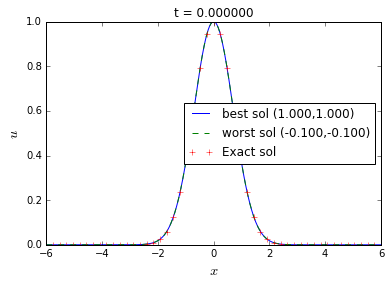

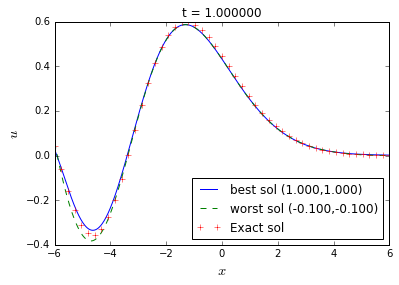

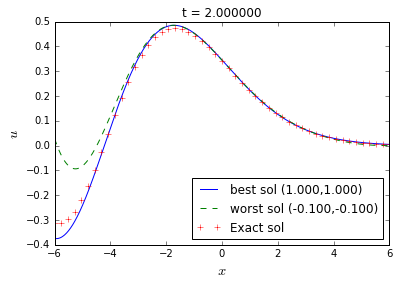

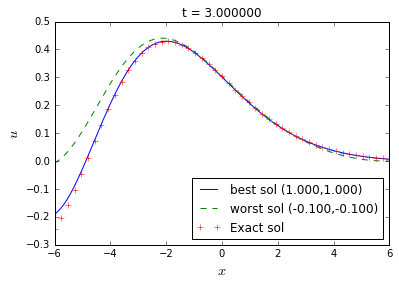

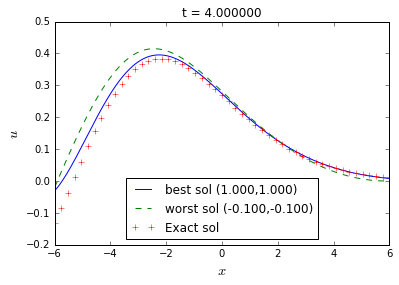

In [111]:
tsnaps = np.array([0.,1.,2.,3.,4.])
besseTBC.plotBestWorstSolution(x,u,uallexact,U2,t0,tmax,dt,tall0,tsnaps,
                          testsLight0,criteria="L2",savePath="figures/TBCbesse/BessefirstTestsP0Correct")

In [108]:
#### FINAL
print("Best results - Order 0")
besseTBC.showRanking(testsLight0,10,"L2")

Best results - Order 0
Best results
('(1.000,1.000)', '0.105241902415', '0.107543810109')
('(1.000,10.000)', '0.106886559713', '0.109856882002')
('(1.000,0.100)', '0.109291437982', '0.110879377847')
('(1.000,0.000)', '0.109962119274', '0.111613324985')
('(1.000,-10.000)', '0.10892188875', '0.111708161825')
('(1.000,-0.100)', '0.110593382924', '0.112349327006')
('(1.000,-1.000)', '0.111018632966', '0.113781032309')
('(10.000,1.000)', '0.275512866368', '0.344703849892')
('(10.000,0.100)', '0.275552784536', '0.345100899836')
('(10.000,0.000)', '0.275716925527', '0.345208181531')


In [ ]:
besseTBC.animateBestSolution(x,u,uallexact,U2,t0,tmax,dt,testsLight0,criteria="L2")

In [ ]:
uallmin = tests[testL2min][2]
uallmax = tests[testL2max][2] 
tall = tests[testL2min][3]

ymin = np.amin(np.concatenate(uall))
ymax = np.amax(np.concatenate(uall))

gF.plotAnimationNSolutions(3,x,np.array([uallmin,uallmax,uallexact]),tall,xmin,xmax,ymin,ymax+.2,["best sol","worst sol","exact"],r'$u$',location=(.7,.7))

### Polynomial of order 1

In [40]:
#computeExactSolution = False

#eps = 0.001
#B = 0.1
#A = 0.001
#wvl = np.sqrt(.5/0.004)
#L = 6.
#xmin = -L
#xmax = L
#N = 501.
#U2 = 1.

#dx = (xmax-xmin)/N
#x = kdv.discretizeSpace(xmin,xmax,dx)
#x = np.linspace(xmin,xmax,N)
#dx = x[1] - x[0]
#cs = np.array([-10., -1., 0. , 0.1, 1., 10.])
#ds = np.array([-10., -1., 0. ,  0.1, 1., 10.])



computeExactSolution = False

L = 6.
xmin = -L
xmax = L
N = 501.
U2 = 1.
t0 = 0.
tmax = 4.
tmax=4.
dt = 4/2560.

dx = (xmax-xmin)/N
x = np.linspace(xmin,xmax,N)
dx = np.diff(x)[0]

cs = np.array([-10., -1., -0.1, 0. , 0.1, 1., 10.])
ds = np.array([-10., -1., -0.1, 0. ,  0.1, 1., 10.])
u = besseTBC.initGauss(x)

tallaux = np.arange(t0,tmax+dt,dt)








tests = {}

order = .5

cntTests = 0

coefTBC = np.zeros((1+1,2))

if computeExactSolution :
    print("*** Computing initial solution")
    for i in range(1,tallaux.size) :
        if i%10 == 0:
            print(r"t = %.6f"%tallaux[i])
        uallexact[:,i] = besseTBC.exactSolution(x,tallaux[i],besseTBC.initGauss)

    #Save initial solution
    fn = "testSol"
    with open(fn,'w') as f:
        pickle.dump(uallexact,f)
    uallexact2 = np.copy(uallexact)
else :
    #Load initial solution
    fn = "testSol"
    with open(fn,'r') as f:
        uallexact = pickle.load(f)

order = 1

for cL in cs:
    for dL in ds:
        cntTests = cntTests+1
        
#        tmax = 4.
#        t0 = 0.
#        u = np.zeros_like(x)
#        u = np.exp(-x*x)
#        dt = 5*4/2560.
        
        for j in range(2):
            coefTBC[0,j] = cL
            coefTBC[1,j] = dL
                 

        uall,tall = besseTBC.runDispKdV(x,u,t0,tmax-dt,U2, coefTBC ,periodic=0, vardt = False, dt = dt, verbose = False,
                               order = order)
        print(cL,dL)

        #if cntTests > 0:
        #    uallexact = np.copy(uall)
        #    for i in range(1,tall.size) :
        #        uallexact[:,i] = exactSolution(x,tall[i])
                
        #    coef = np.amax(uallexact[:,1])/np.amax(uall[:,1])
        #    uallexact[:,1:] = uallexact[:,1:]/coef
        
        en,ErrTm,ErrL2 = besseTBC.computeError(uall,uallexact,dt)
            
        tests[(cntTests)] = (cL,dL,uall,tall,en,ErrTm,ErrL2)
        
testsO1 = tests


*** Computing solution ...
*** End of computation ***
(-10.0, -10.0)

*** Computing solution ...
*** End of computation ***
(-10.0, -1.0)

*** Computing solution ...
*** End of computation ***
(-10.0, -0.10000000000000001)

*** Computing solution ...
*** End of computation ***
(-10.0, 0.0)

*** Computing solution ...
*** End of computation ***
(-10.0, 0.10000000000000001)

*** Computing solution ...
*** End of computation ***
(-10.0, 1.0)

*** Computing solution ...
*** End of computation ***
(-10.0, 10.0)

*** Computing solution ...
*** End of computation ***
(-1.0, -10.0)

*** Computing solution ...
*** End of computation ***
(-1.0, -1.0)

*** Computing solution ...
*** End of computation ***
(-1.0, -0.10000000000000001)

*** Computing solution ...
*** End of computation ***
(-1.0, 0.0)

*** Computing solution ...
*** End of computation ***
(-1.0, 0.10000000000000001)

*** Computing solution ...
*** End of computation ***
(-1.0, 1.0)

*** Computing solution ...
*** End of computatio

/Users/joaocaldas/Softwares/anaconda2/lib/python2.7/site-packages/numpy/linalg/linalg.py:2156: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


*** End of computation ***
(0.0, -10.0)

*** Computing solution ...
*** End of computation ***
(0.0, -1.0)

*** Computing solution ...
*** End of computation ***
(0.0, -0.10000000000000001)

*** Computing solution ...
*** End of computation ***
(0.0, 0.0)

*** Computing solution ...
*** End of computation ***
(0.0, 0.10000000000000001)

*** Computing solution ...
*** End of computation ***
(0.0, 1.0)

*** Computing solution ...
*** End of computation ***
(0.0, 10.0)

*** Computing solution ...
*** End of computation ***
(0.10000000000000001, -10.0)

*** Computing solution ...
*** End of computation ***
(0.10000000000000001, -1.0)

*** Computing solution ...
*** End of computation ***
(0.10000000000000001, -0.10000000000000001)

*** Computing solution ...
*** End of computation ***
(0.10000000000000001, 0.0)

*** Computing solution ...
*** End of computation ***
(0.10000000000000001, 0.10000000000000001)

*** Computing solution ...
*** End of computation ***
(0.10000000000000001, 1.0)



In [23]:
testsO1[1][6]

0.37182463319530518

In [18]:
testsO1[1][6]

0.38639598735850345

In [41]:
errorsall = np.array([(int(key),tests[key][5], tests[key][6], tests[key][0], tests[key][1]) for key in tests.keys()])

cnt = 0
## ignore explosed solutions
for i in range(errorsall.shape[0]) :
    if errorsall[i,1] < 10 :
        if cnt == 0:
            errors = errorsall[i,:]
        else:
            errors = np.vstack((errors,errorsall[i,:]))
        cnt = cnt+1
    
print(errorsall.shape,errors.shape)
testTmmax = errors[np.argmax(errors[:,1]),0]
testTmmin = errors[np.argmin(errors[:,1]),0]
testL2max = errors[np.argmax(errors[:,2]),0]
testL2min = errors[np.argmin(errors[:,2]),0]
print('ErrTm Max = ',tests[testTmmax][5], r"cL = %.3f" %tests[testTmmax][0],r"cR = %.3f" %tests[testTmmax][1])
print('ErrTm Min = ',tests[testTmmin][5], r"cL = %.3f" %tests[testTmmin][0],r"cR = %.3f" %tests[testTmmin][1])
print('ErrL2 Max = ',tests[testL2max][6], r"cL = %.3f" %tests[testL2max][0],r"cR = %.3f" %tests[testL2max][1])
print('ErrL2 Min = ',tests[testL2min][6], r"cL = %.3f" %tests[testL2min][0],r"cR = %.3f" %tests[testL2min][1])

errorsO1 = np.copy(errors)
testTmmaxO1 = testTmmax
testTmminO1 = testTmmin
testL2maxO1 = testL2max
testL2minO1 = testL2min

((49, 5), (40, 5))
('ErrTm Max = ', 8.4181369833445885, 'cL = 0.100', 'cR = -0.100')
('ErrTm Min = ', 0.10524190241495493, 'cL = 0.000', 'cR = 1.000')
('ErrL2 Max = ', 5.4772334561828862, 'cL = 0.100', 'cR = -0.100')
('ErrL2 Min = ', 0.10754381010865523, 'cL = 0.000', 'cR = 1.000')


In [42]:
print("Best results - Order 1 truncated")
index = np.argsort(errorsO1[:,2])
for i in range(10):
    print(errorsO1[index[i],:])

Best results - Order 1 truncated
[ 27.           0.1052419    0.10754381   0.           1.        ]
[ 34.           0.11568736   0.14050496   0.1          1.        ]
[  7.           0.17173136   0.19200976 -10.          10.        ]
[ 9.          0.18768503  0.22789348 -1.         -1.        ]
[ 41.           0.27313129   0.30877876   1.           1.        ]
[  6.           0.29232028   0.32790405 -10.           1.        ]
[  5.           0.30261476   0.33522204 -10.           0.1       ]
[  4.           0.30362759   0.33596842 -10.           0.        ]
[  3.           0.30461626   0.33670228 -10.          -0.1       ]
[  2.           0.31251862   0.34277524 -10.          -1.        ]


In [25]:
print("Best results - Order 1 truncated")
index = np.argsort(errorsO1[:,1])
for i in range(10):
    print(errorsO1[index[i],:])

Best results - Order 1 truncated
[ 27.           0.1052419    0.10754381   0.           1.        ]
[ 34.           0.11568736   0.14050496   0.1          1.        ]
[  7.           0.17173136   0.19200976 -10.          10.        ]
[ 9.          0.18768503  0.22789348 -1.         -1.        ]
[ 26.           0.26729623   0.37713227   0.           0.1       ]
[ 41.           0.27313129   0.30877876   1.           1.        ]
[ 28.           0.27735156   0.34547461   0.          10.        ]
[ 35.           0.27760401   0.34605058   0.1         10.        ]
[ 42.           0.27999622   0.35139194   1.          10.        ]
[ 25.           0.28323983   0.40624189   0.           0.        ]


In [44]:
errorsall = np.array([(int(key),tests[key][5], tests[key][6], tests[key][0], tests[key][1]) for key in tests.keys()])

cnt = 0
## ignore explosed solutions
for i in range(errorsall.shape[0]) :
    if errorsall[i,1] < 10 :
        if cnt == 0:
            errors = errorsall[i,:]
        else:
            errors = np.vstack((errors,errorsall[i,:]))
        cnt = cnt+1
    
print(errorsall.shape,errors.shape)
testTmmax = errors[np.argmax(errors[:,1]),0]
testTmmin = errors[np.argmin(errors[:,1]),0]
testL2max = errors[np.argmax(errors[:,2]),0]
testL2min = errors[np.argmin(errors[:,2]),0]
print('ErrTm Max = ',tests[testTmmax][5], r"cL = %.3f" %tests[testTmmax][0],r"cR = %.3f" %tests[testTmmax][1])
print('ErrTm Min = ',tests[testTmmin][5], r"cL = %.3f" %tests[testTmmin][0],r"cR = %.3f" %tests[testTmmin][1])
print('ErrL2 Max = ',tests[testL2max][6], r"cL = %.3f" %tests[testL2max][0],r"cR = %.3f" %tests[testL2max][1])
print('ErrL2 Min = ',tests[testL2min][6], r"cL = %.3f" %tests[testL2min][0],r"cR = %.3f" %tests[testL2min][1])

errorsO1 = np.copy(errors)
testTmmaxO1 = testTmmax
testTmminO1 = testTmmin
testL2maxO1 = testL2max
testL2minO1 = testL2min

((36, 5), (32, 5))
('ErrTm Max = ', 3.2903835882735115, 'cL = -1.000', 'cR = 0.000')
('ErrTm Min = ', 0.092636275612934332, 'cL = 0.000', 'cR = 1.000')
('ErrL2 Max = ', 2.1797020231078861, 'cL = -1.000', 'cR = 0.000')
('ErrL2 Min = ', 0.094683923163559905, 'cL = 0.000', 'cR = 1.000')


In [45]:
print("Best results - Order 1 truncated")
index = np.argsort(errorsO1[:,1])
for i in range(10):
    print(errorsO1[index[i],:])

Best results - Order 1 truncated
[ 17.           0.09263628   0.09468392   0.           1.        ]
[ 23.           0.09962944   0.12341195   0.1          1.        ]
[ 29.           0.16613415   0.20031603   1.           1.        ]
[ 34.           0.1806418    0.22037249  10.           0.1       ]
[  4.           0.1853722    0.23984486 -10.           0.1       ]
[ 35.           0.19438048   0.27161158  10.           1.        ]
[  3.           0.20787979   0.24800816 -10.           0.        ]
[  5.           0.21482528   0.30039637 -10.           1.        ]
[ 33.           0.24021443   0.27213611  10.           0.        ]
[ 16.           0.25531126   0.36740764   0.           0.1       ]


In [355]:
print("Best results - Order 1 truncated")
index = np.argsort(errorsO1[:,1])
for i in range(10):
    print(errorsO1[index[i],:])

Best results - Order 1 truncated
[ 17.           0.09263628   0.09468392   0.           1.        ]
[ 23.           0.09962944   0.12341195   0.1          1.        ]
[ 29.           0.16613415   0.20031603   1.           1.        ]
[ 34.           0.1806418    0.22037249  10.           0.1       ]
[  4.           0.1853722    0.23984486 -10.           0.1       ]


In [ ]:
uallmin = tests[testL2min][2]
uallmax = tests[testL2max][2] 
tall = tests[testL2min][3]

ymin = np.amin(np.concatenate(uall))
ymax = np.amax(np.concatenate(uall))

gF.plotAnimationNSolutions(3,x,np.array([uallmin,uallmax,uallexact]),tall,xmin,xmax,ymin,ymax+.2,["best sol","worst sol","exact"],r'$u$',location=(.7,.7))

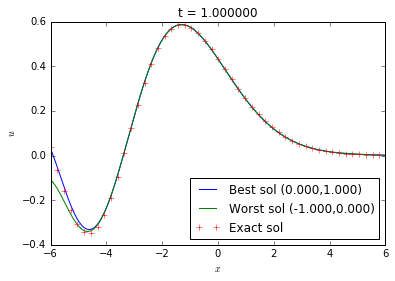

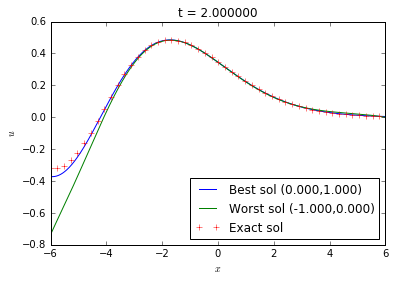

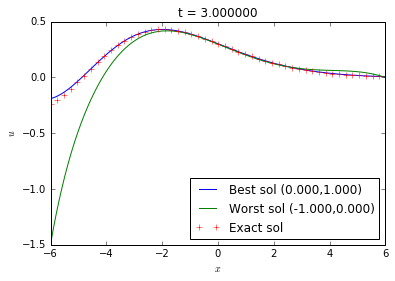

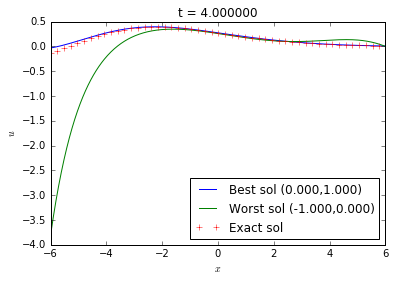

In [361]:
uallmin = tests[testL2min][2]
coefsBest = tests[testL2min][0:2]
uallmax = tests[testL2max][2] 
coefsWorst = tests[testL2max][0:2]
tall = tests[testL2min][3]

cnt = 0
for t in [1.,2.,3.,4.] :
    plt.figure()
    it = np.argmin(np.absolute(tall-t))
    plt.plot(x,uallmin[:,it],label='Best sol (%.3f,%.3f)'%(coefsBest[0],coefsBest[1]))
    plt.plot(x,uallmax[:,it],label='Worst sol (%.3f,%.3f)'%(coefsWorst[0],coefsWorst[1]))
    plt.plot(x,uallexact[:,it],marker='+',markevery=10,linestyle='None', label='Exact sol')
    plt.title(r't = %f'%tall[it])
    plt.legend(loc = 0.)
    plt.xlabel("$x$")
    plt.ylabel("$u$")
    plt.savefig("figures/TBCbesse/firstTestsP1Snap"+str(cnt)+".png")
    cnt = cnt+1

### Comparison between the two approximations

In [23]:
testL2minO0 = int(testL2minO0)
testL2minO1 = int(testL2minO1)

uallminO0 = testsO0[testL2minO0][2]
uallminO1 = testsO1[testL2minO1][2]

print('ErrL2 Min Order 0 = ',testsO0[testL2minO0][6], r"cL = %.3f" %testsO0[testL2minO0][0],r"cR = %.3f" %testsO0[testL2minO0][1])
print('ErrL2 Min Order 1 = ',testsO1[testL2minO1][6], r"cL = %.3f" %testsO1[testL2minO1][0],r"dL = %.3f" %testsO1[testL2minO1][1])

('ErrL2 Min Order 0 = ', 0.33937348279836016, 'cL = 10.000', 'cR = -1.000')
('ErrL2 Min Order 1 = ', 0.098090794467468198, 'cL = 0.000', 'dL = 1.000')


In [ ]:
tall = testsO1[testL2minO1][3]

ymin = np.amin(np.append(uallminO0,uallminO1))
ymax = np.amax(np.append(uallminO0,uallminO1))

gF.plotAnimationNSolutions(3,x,np.array([uallminO0,uallminO1,uallexact]),tall,xmin,xmax,ymin,ymax+.2,["best sol Order 0","best sol Order 1","exact"],r'$u$',location=(.7,.7))

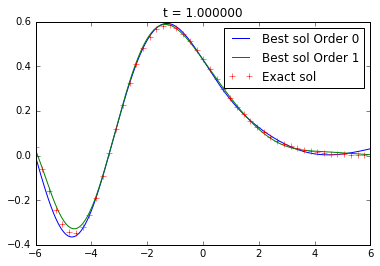

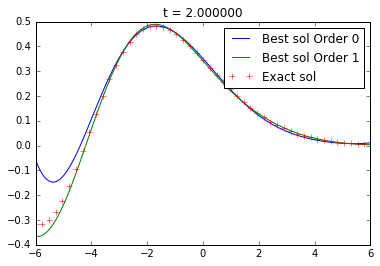

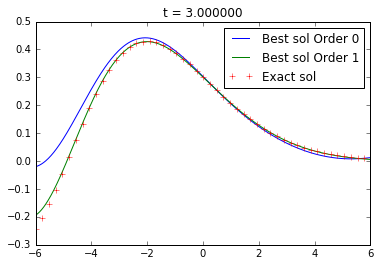

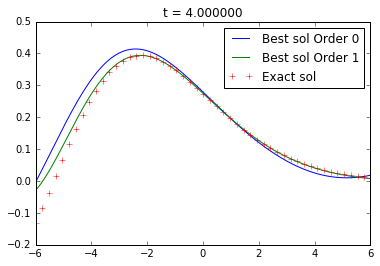

In [25]:
for t in [1.,2.,3.,4.] :
    plt.figure()
    it = np.argmin(np.absolute(tall-t))
    plt.plot(x,uallminO0[:,it],label='Best sol Order 0')
    plt.plot(x,uallminO1[:,it],label='Best sol Order 1')
    plt.plot(x,uallexact[:,it],marker='+',markevery=10,linestyle='None', label='Exact sol')
    plt.title(r't = %f'%tall[it])
    plt.legend()